# IPL DATA ANALYSIS 
# AND 
# WIN PROBABILITY PREDICTOR

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#reading the datasets
matdf=pd.read_csv('matches.csv') #matc
deldf = pd.read_csv('deliveries.csv') #dele
dele = pd.read_csv('deliveries.csv')
matc=pd.read_csv('matches.csv') 

In [3]:
matdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# import seaborn as sns #
# plt.style.use("ggplot") #

In [5]:
#getting the rows and columns in each dataset

print("Shape of matches.csv: ",matc.shape)
print("Shape of deliveris.csv: ",dele.shape)

Shape of matches.csv:  (756, 18)
Shape of deliveris.csv:  (179078, 21)


In [6]:
print(matc.isnull().sum()) #count of missing values 
# matc.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [7]:
#getting the information of matches.csv
matc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
dele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
#getting the names of teams
print(matc['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [10]:
#renaming the names of teams with their abbreviated names
x=matc['team1'].unique()
y=['SRH','MI','GJ','RPSG','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PWI','RPSG','DD'] #delhi and rpsg same teams with diff names
matdf.replace(x,y,inplace=True)
deldf.replace(x,y,inplace=True)

In [11]:
matdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPSG,RPSG,field,normal,0,RPSG,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GJ,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPSG,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
deldf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
matdf['team1'].unique()

array(['SRH', 'MI', 'GJ', 'RPSG', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC', 'KTK', 'PWI'], dtype=object)

In [14]:
print("number of different teams totally participated",len(matdf['team1'].unique())) #number of teams

number of different teams totally participated 13


## MATCH ANALYSIS

In [15]:
#unique matches 
matdf.groupby('season').size()        #groupby().count() gets every column with same value

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
dtype: int64

In [16]:
matdf['season'].value_counts()    #increasing order value counts 

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [17]:
season_year=matdf['season'].unique()

In [18]:
seasonwisematches=pd.DataFrame(matdf['season'].value_counts())

In [19]:
seasonwisematches.head()

,season
2013,76
2012,74
2011,73
2010,60
2014,60


In [20]:

seasonwisematches = seasonwisematches.reset_index()

In [21]:
seasonwisematches.head()

,index,season
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60


In [22]:
seasonwisematches=seasonwisematches.rename(columns={'index':'season_year','season':'matches'})   #df.columns=['name1','name2']

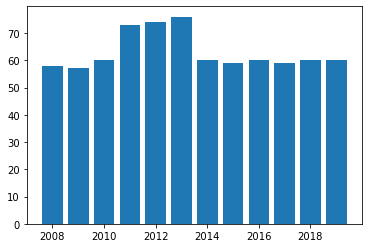

In [23]:
plt.bar(seasonwisematches.season_year,seasonwisematches.matches)
plt.show()

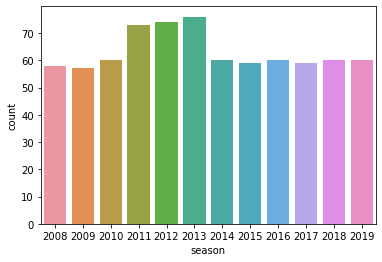

In [24]:
import seaborn as sns
sns.countplot(x ='season', data = matdf)
plt.show()

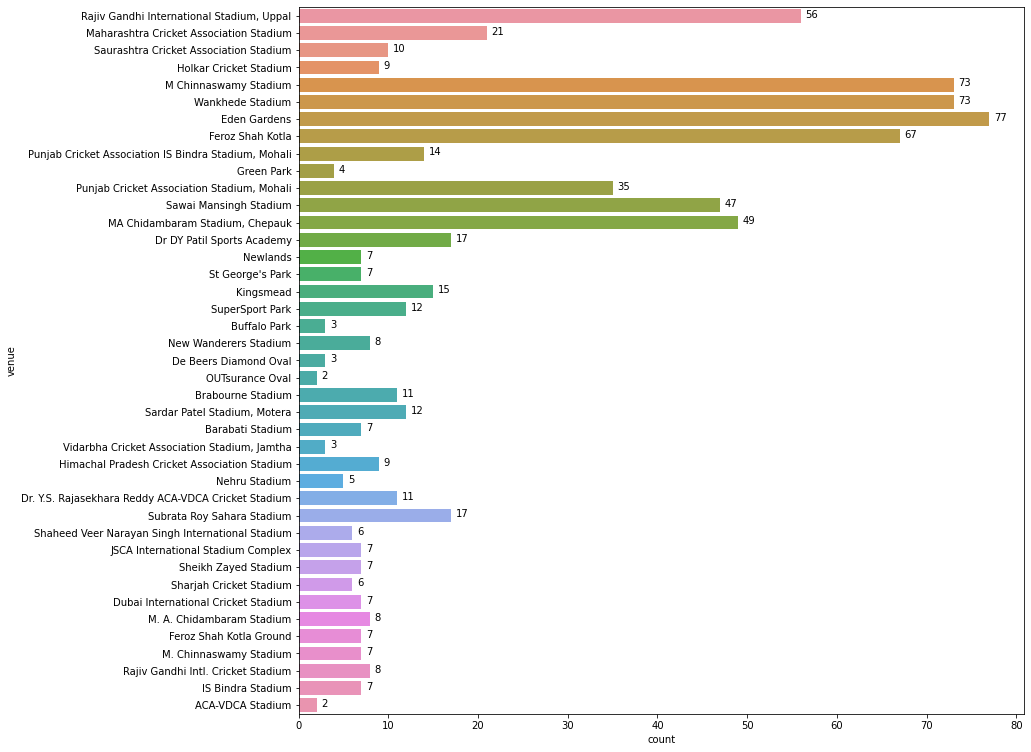

In [25]:
plt.figure(figsize=(13,13))
countplot=sns.countplot(y='venue',data=matdf)
for x in countplot.patches:
    countplot.annotate(format(x.get_width()), (x.get_width()+0.5,x.get_y()+0.5, ))
plt.show()

## manofmatches

In [26]:
potm=matdf['player_of_match'].value_counts()

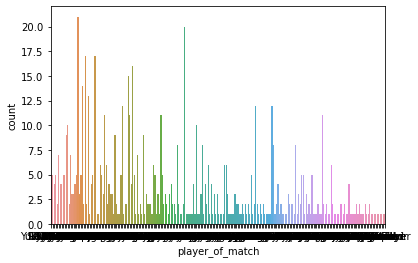

In [27]:
sns.countplot(x ='player_of_match', data = matdf)
plt.show()

In [28]:
potm.head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [29]:
potm=potm.reset_index()

In [30]:
potm.columns=['name','times']

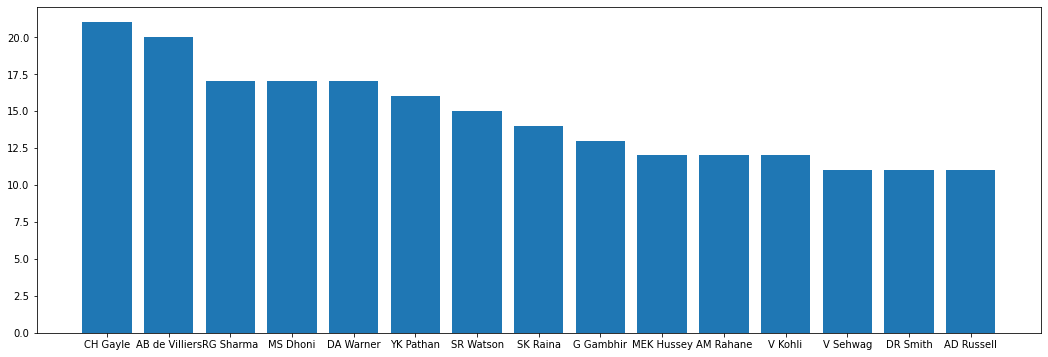

In [31]:
plt.figure(figsize=(18,6))
plt.bar(potm['name'].head(15),potm['times'].head(15))
plt.show()

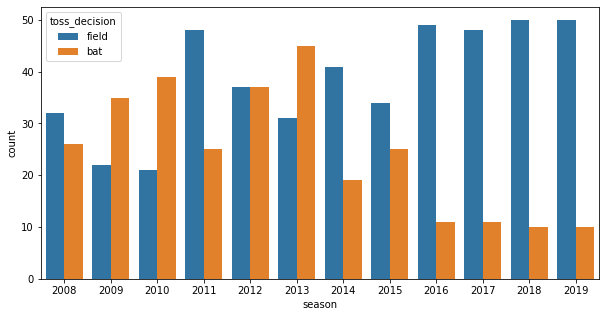

In [32]:
plt.subplots(figsize=(10,5))
sns.countplot(x="season",hue="toss_decision",data=matdf)
plt.show()

## toss vs match win %

In [33]:
wins=(matdf['toss_winner']==matdf['winner'])   #boolean if both are same in the row

In [34]:
type(wins)

pandas.core.series.Series

In [35]:
wins.value_counts()

True     393
False    363
dtype: int64

<AxesSubplot:ylabel='None'>

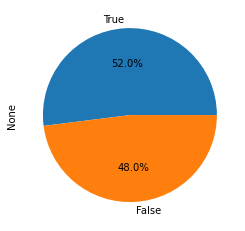

In [36]:
wins.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [37]:
matdf['city']=matdf['city'].replace("Bengaluru","Bangalore")

In [38]:
cities=matdf.groupby('city')['season'].nunique()

In [39]:
cities

city
Abu Dhabi          1
Ahmedabad          3
Bangalore         11
Bloemfontein       1
Cape Town          1
Centurion          1
Chandigarh         9
Chennai            8
Cuttack            3
Delhi             11
Dharamsala         4
Durban             1
East London        1
Hyderabad         10
Indore             3
Jaipur             7
Johannesburg       1
Kanpur             2
Kimberley          1
Kochi              1
Kolkata           11
Mohali             2
Mumbai            11
Nagpur             1
Port Elizabeth     1
Pune               6
Raipur             3
Rajkot             2
Ranchi             3
Sharjah            1
Visakhapatnam      4
Name: season, dtype: int64

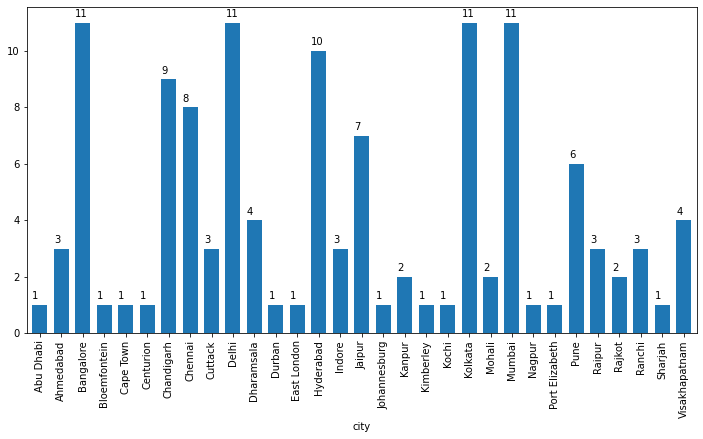

In [40]:
plt.figure(figsize=(12,6))
cityplot=cities=matdf.groupby('city')['season'].nunique().plot.bar(width=0.7)
for p in cityplot.patches:
    cityplot.annotate(format(p.get_height()), (p.get_x(), p.get_height()+0.2))

In [41]:
print(matdf.iloc[matdf['win_by_runs'].idxmax()])   #idxmax()

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [42]:
matdf.iloc[matdf['win_by_runs'].idxmax()].winner

'MI'

In [43]:
 matdf.iloc[matdf['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                                    SRH
team2                                                    RCB
toss_winner                                              RCB
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                                   SRH
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [44]:
matdf.loc[matdf['toss_decision']=='field'].shape

(463, 18)

In [45]:
# Details on Toss won by each team, Total Matches played so far, total matches being won list.
team_stats = pd.DataFrame({'Total Matches played': matdf.team1.value_counts() + matdf.team2.value_counts(), 'Total won': matdf.winner.value_counts(), 'Toss won': matdf.toss_winner.value_counts(), 
                          'Total lost': ((matdf.team1.value_counts() + matdf.team2.value_counts()) - matdf.winner.value_counts())})   #both team1 and team2
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost
0,CSK,164,100,89,64
1,DC,75,29,43,46
2,DD,177,77,90,100
3,GJ,30,13,15,17
4,KKR,178,92,92,86
5,KTK,14,6,8,8
6,KXIP,176,82,81,94
7,MI,187,109,98,78
8,PWI,46,12,20,34
9,RCB,180,84,81,96


In [46]:
matdf[matdf['season']==2008].groupby('winner').size()

winner
CSK      9
DC       2
DD       7
KKR      6
KXIP    10
MI       7
RCB      4
RR      13
dtype: int64

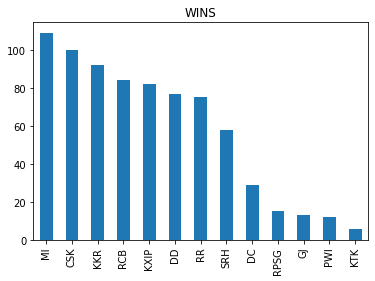

In [47]:
matdf['winner'].value_counts().plot(kind='bar',title='WINS')
plt.show()

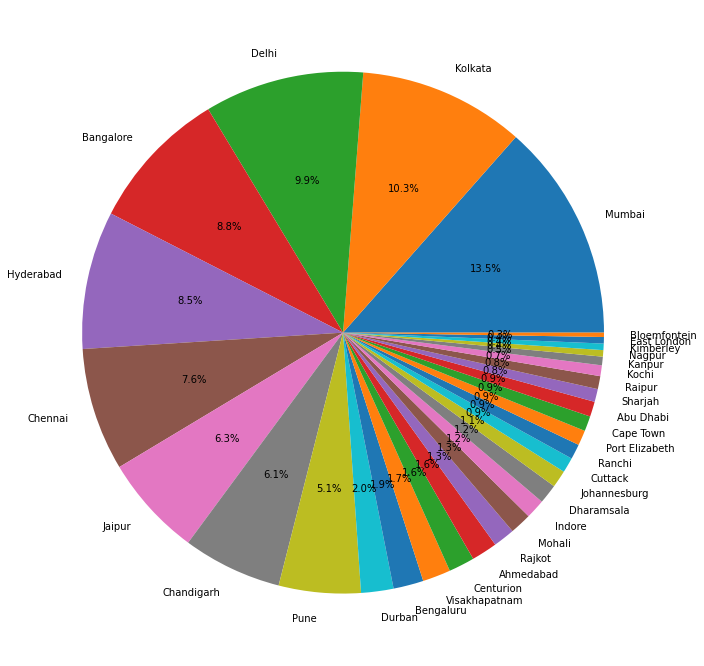

In [48]:
plt.figure(figsize=(14,12))
plt.pie(matc['city'].value_counts(),labels=matc['city'].value_counts().keys(),autopct='%0.1f%%')
plt.show()

In [49]:
kkrwins=matdf[matdf['winner']=='KKR'].groupby('season').count()       #size()
kkrwins

,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
2009,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2010,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
2011,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0
2012,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0
2013,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
2014,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
2016,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0


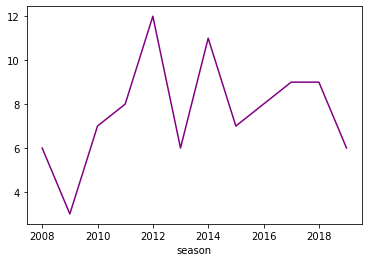

In [50]:
kkrwins['winner'].plot(kind='line',color='purple')
plt.show()

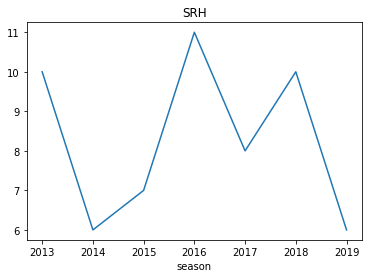

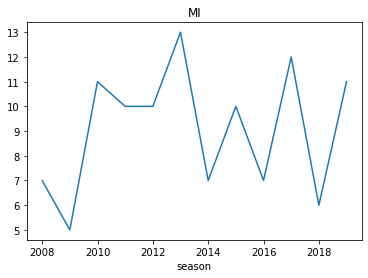

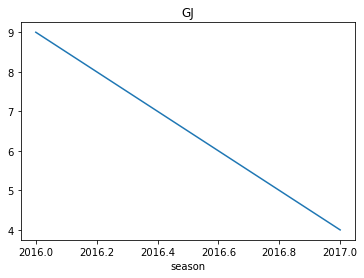

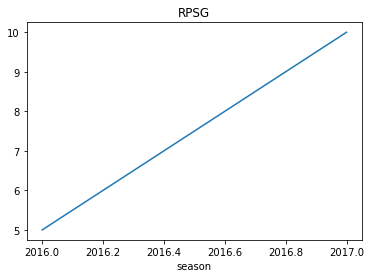

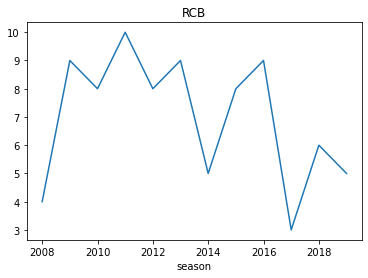

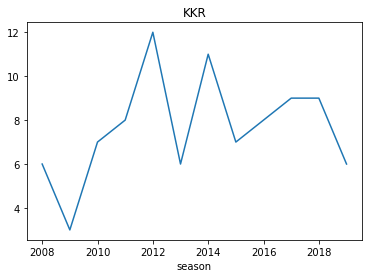

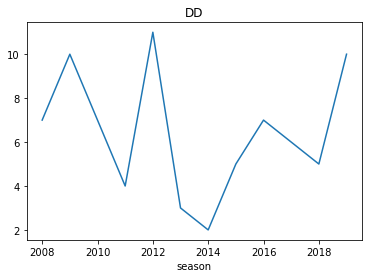

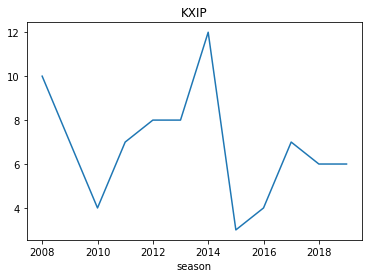

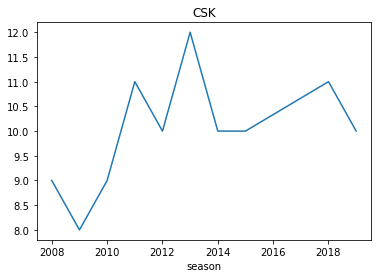

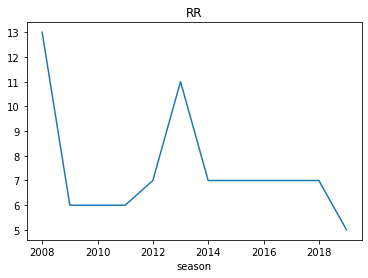

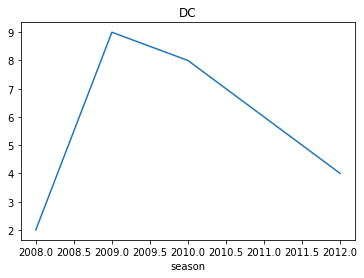

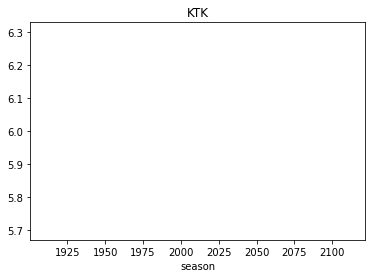

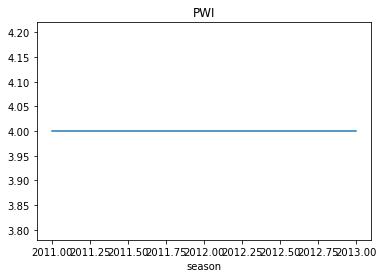

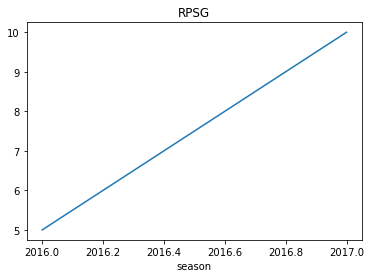

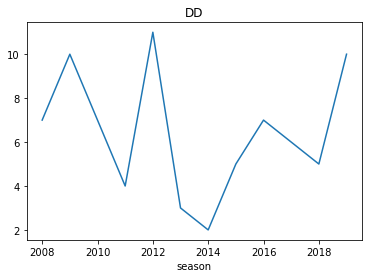

In [51]:
y=['SRH','MI','GJ','RPSG','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PWI','RPSG','DD']
for i in y:
    wins=matdf[matdf['winner']==i].groupby('season').count() 
    wins['winner'].plot(kind='line',title=i)
    plt.show()

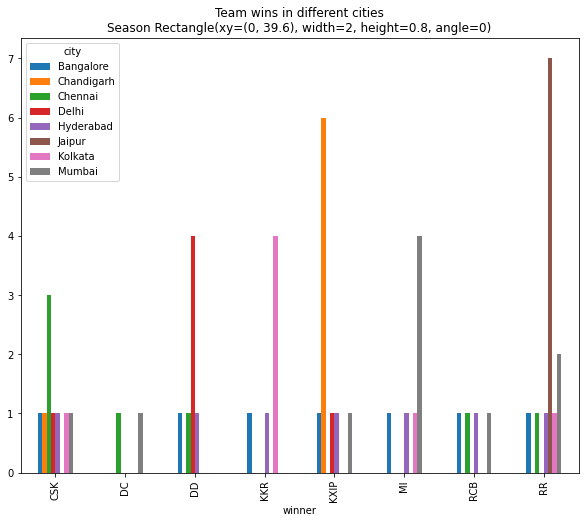

In [52]:
wins_percity = matdf[matdf['season'] == 2008].groupby(['winner', 'city'])['id'].count().unstack()
plot = wins_percity.plot(kind='bar', title="Team wins in different cities\nSeason "+str(x), figsize=(10, 8))

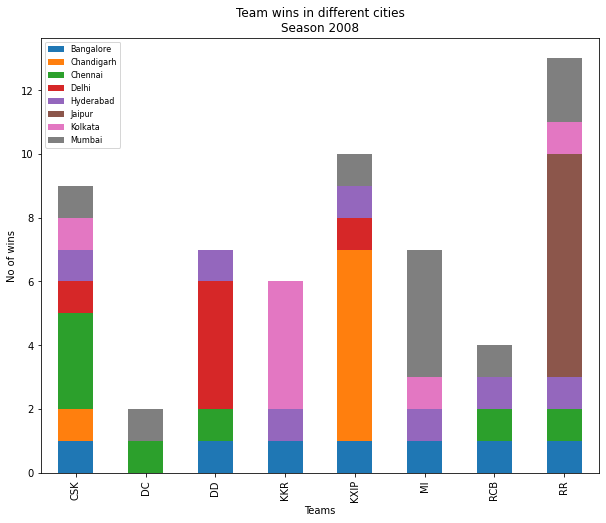

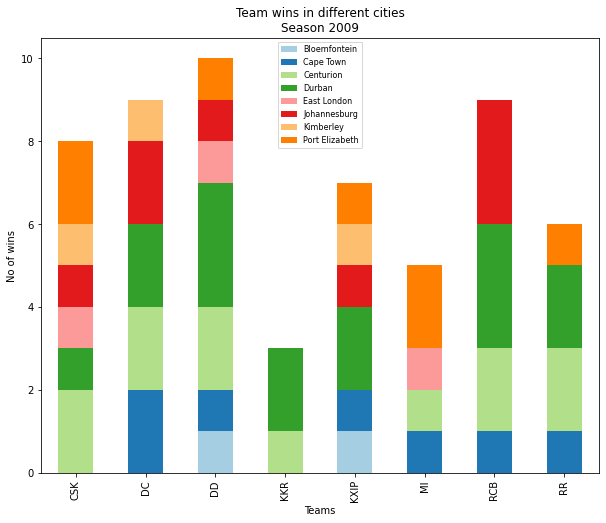

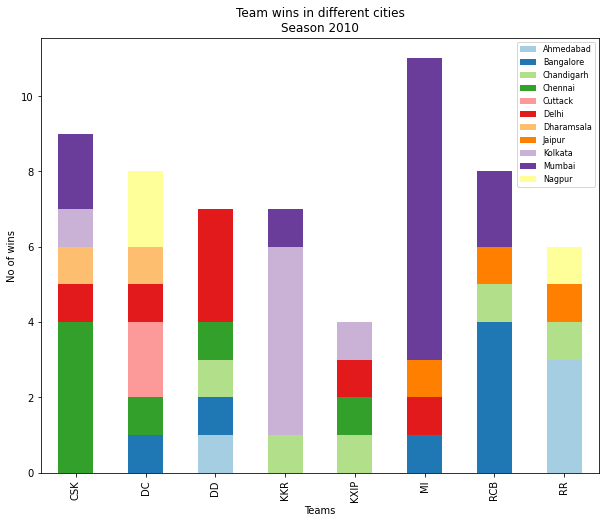

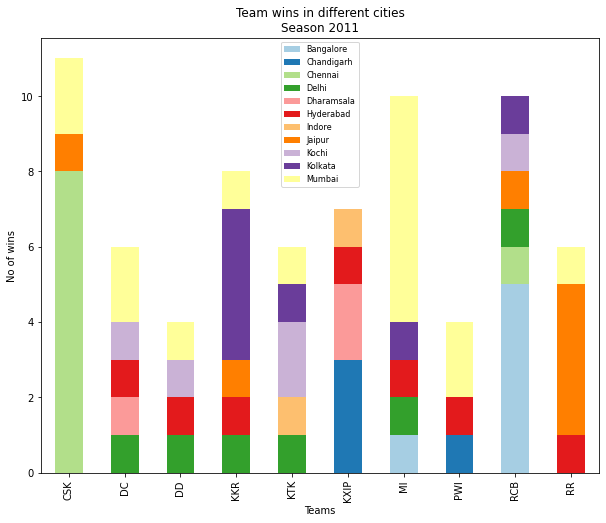

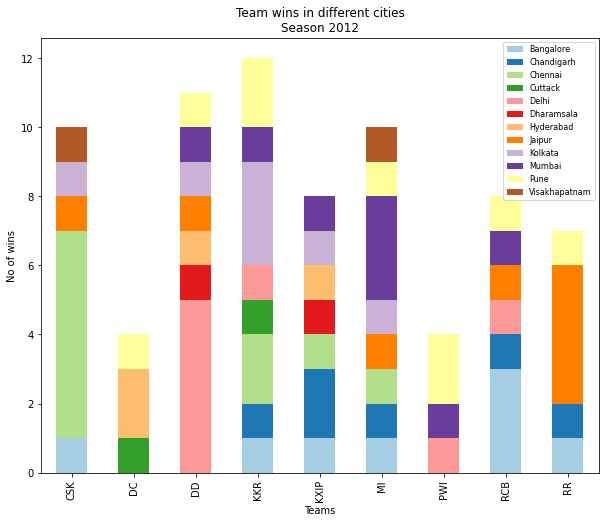

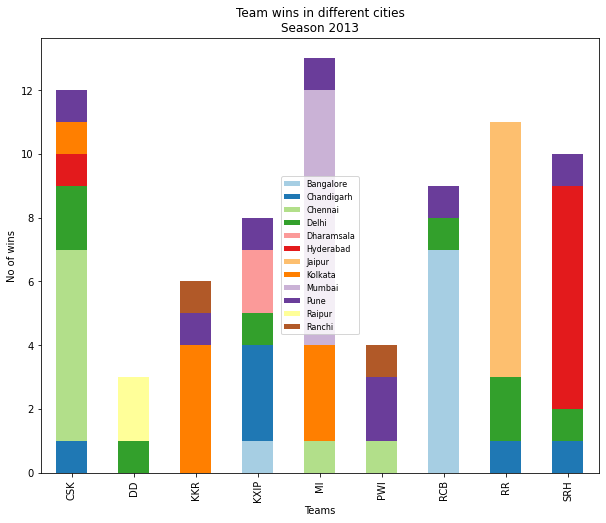

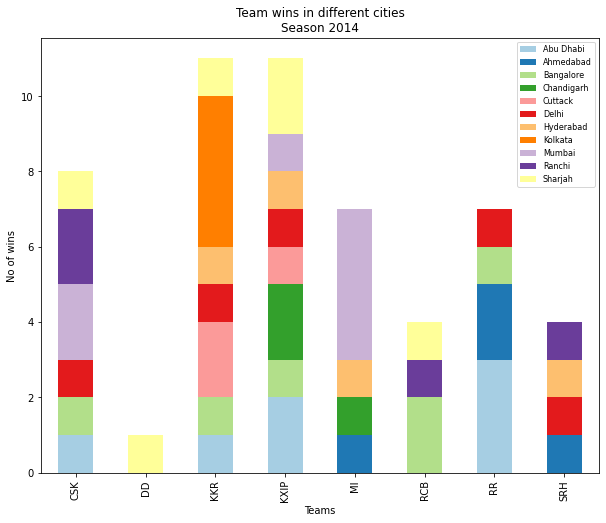

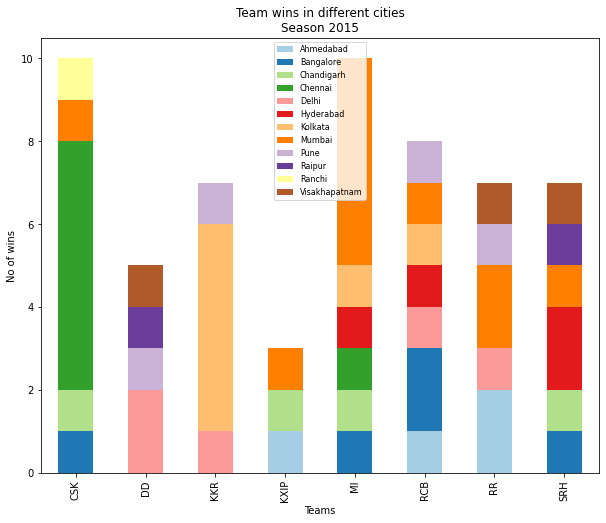

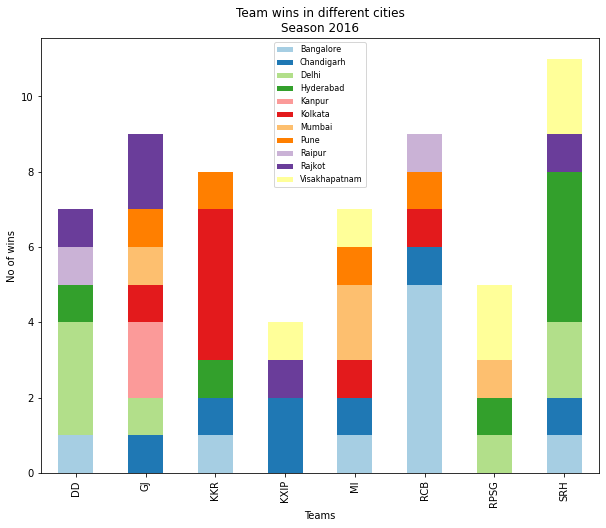

In [53]:
x, y = 2008, 2017
while x < y:
    wins_percity = matdf[matdf['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(10, 8))
    sns.set_palette("Paired", len(matdf['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

In [54]:
season_winner = matc.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner


,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [55]:
dele.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [56]:
dele[dele['batsman']=='G Gambhir'].groupby(['batsman']).size()

batsman
G Gambhir    3524
dtype: int64

In [57]:
most6s=dele[dele['batsman_runs']==6].groupby('batsman').size().sort_values(ascending=False) #count().sort_values(ascending=False,by='batsman_runs')
most6s.head(10)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
dtype: int64

In [58]:
batsman_runs=dele.groupby('batsman')
type(batsman_runs.size())

pandas.core.series.Series

In [59]:
runsdf=pd.DataFrame(batsman_runs.size())
runsdf=runsdf.reset_index()
runsdf

,batsman,0
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
511,YV Takawale,183
512,Yashpal Singh,67
513,Younis Khan,7
514,Yuvraj Singh,2207


In [60]:
runsdf.columns=['name','runs']

In [61]:
runsdf=pd.DataFrame(runsdf)

In [62]:
runsdf.sort_values(by=['runs'],ascending=False,ignore_index=True)        #sort by value diff for df and series

,name,runs
0,V Kohli,4211
1,SK Raina,4044
2,RG Sharma,3816
3,S Dhawan,3776
4,G Gambhir,3524
...,...,...
511,P Raj,1
512,Sunny Gupta,1
513,LH Ferguson,1
514,C Nanda,1


In [63]:
club3000=runsdf.where(runsdf['runs']>=3000).dropna().sort_values(by='runs',ascending=False)[['name','runs']]
club3000

,name,runs
486,V Kohli,4211.0
428,SK Raina,4044.0
367,RG Sharma,3816.0
392,S Dhawan,3776.0
147,G Gambhir,3524.0
384,RV Uthappa,3492.0
112,DA Warner,3398.0
290,MS Dhoni,3318.0
42,AM Rahane,3215.0
92,CH Gayle,3131.0


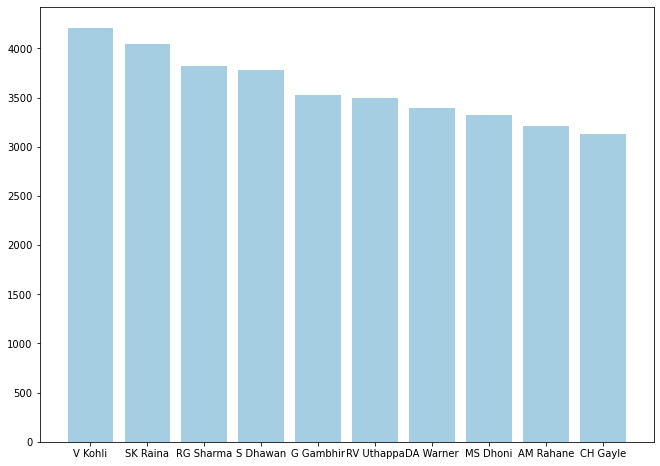

In [64]:
plt.figure(figsize=(11,8))
plt.bar(club3000['name'],club3000['runs'])
plt.show()

In [65]:
batsman_summary=dele.groupby('batsman').agg({'ball':'count','batsman_runs':'sum'})

In [66]:
batsman_summary = batsman_summary.sort_values(['ball','batsman_runs'], ascending=False)
batsman_summary.head(10)

,ball,batsman_runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


In [67]:
batsman_summary['sr']= batsman_summary['batsman_runs']/batsman_summary['ball'] * 100

In [68]:
batsman_summary['sr']=batsman_summary['sr'].round(2)

In [69]:
batsman_summary

,ball,batsman_runs,sr
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
...,...,...,...
S Lamichhane,1,0,0.00
Sunny Gupta,1,0,0.00
U Kaul,1,0,0.00


# WIN PROBABILITY PREDICTOR

In [70]:
total_score_df=dele.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [71]:
#batting team bowling team   city   runsleft    balls left    wicketsleft    runsin1st    curr runrate    req runrate    reuslt 

## Merging total score to the matches 

In [72]:
total_1st_inscore=total_score_df[total_score_df['inning']==1]

In [73]:
matdf=matdf.merge(total_1st_inscore[['match_id','total_runs']],left_on='id',right_on='match_id')       #merging

In [74]:
matpred=matdf
y=['SRH','MI','GJ','RPSG','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PWI','RPSG','DD']
matpred = matpred[matpred['team1'].isin(y)]
matpred = matpred[matpred['team2'].isin(y)]

In [75]:
matpred['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [76]:
matpred=matpred[matpred['dl_applied']==0]         #remove rain effected

In [77]:
matpred=matpred.rename(columns={'total_runs':'runsin1st'})

In [78]:
matpred.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'runsin1st'],
      dtype='object')

In [79]:
matpred=matpred[['match_id','city','winner','runsin1st']]          #immportant features

In [80]:
matpred

,match_id,city,winner,runsin1st
0,1,Hyderabad,SRH,207
1,2,Pune,RPSG,184
2,3,Rajkot,KKR,183
3,4,Indore,KXIP,163
4,5,Bangalore,RCB,157
...,...,...,...,...
751,11347,Mumbai,MI,143
752,11412,Chennai,MI,136
753,11413,Visakhapatnam,DD,171
754,11414,Visakhapatnam,CSK,155


In [81]:
delpred=matpred.merge(dele,on='match_id')

In [82]:
delpred=delpred[delpred['inning']==2]              #second innings analysis

## find current run rate and req run rate
   ## find runs left and balls left

In [83]:
delpred.groupby('match_id').cumsum()

,runsin1st,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
125,207,2,1,1,0,0,0,0,0,0,1,0,1
126,414,4,2,3,0,0,0,0,0,0,1,0,1
127,621,6,3,6,0,0,0,0,0,0,1,0,1
128,828,8,4,10,0,0,0,0,0,0,3,0,3
129,1035,10,5,15,0,0,0,0,0,0,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,18240,240,1215,430,0,4,5,0,0,0,143,9,152
175866,18392,242,1235,433,0,4,5,0,0,0,145,9,154
175867,18544,244,1255,437,0,4,5,0,0,0,146,9,155
175868,18696,246,1275,442,0,4,5,0,0,0,148,9,157


In [84]:
delpred['curr_score']=delpred.groupby('match_id').cumsum()['total_runs']

In [85]:
delpred['runleft']=delpred['runsin1st']-delpred['curr_score']

In [86]:
#over indexing from 1 so use 126
delpred['ballsleft']=126 - (delpred['over']*6+delpred['ball'])

In [87]:
t=delpred['batting_team'].unique()                          #ERROR WINNER != BATTINGTEAM 
y=['RCB','RPSG','KKR','KXIP','DD','SRH','MI','GJ','RR','CSK','DC','PWI','KTK','RPSG','DD'] 
delpred.replace(t,y,inplace=True)

In [88]:
delpred

,match_id,city,winner,runsin1st,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,curr_score,runleft,ballsleft
125,1,Hyderabad,SRH,207,2,RCB,SRH,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,SRH,207,2,RCB,SRH,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,SRH,207,2,RCB,SRH,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,SRH,207,2,RCB,SRH,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,SRH,207,2,RCB,SRH,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,Hyderabad,MI,152,2,CSK,MI,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
175866,11415,Hyderabad,MI,152,2,CSK,MI,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
175867,11415,Hyderabad,MI,152,2,CSK,MI,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
175868,11415,Hyderabad,MI,152,2,CSK,MI,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [89]:
delpred['player_dismissed'] = delpred['player_dismissed'].fillna("0")
delpred['player_dismissed'] = delpred['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delpred['player_dismissed'] = delpred['player_dismissed'].astype('int')
wickets = delpred.groupby('match_id').cumsum()['player_dismissed'].values
delpred['wickets'] = 10 - wickets
delpred.head()

,match_id,city,winner,runsin1st,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,curr_score,runleft,ballsleft,wickets
125,1,Hyderabad,SRH,207,2,RCB,SRH,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,SRH,207,2,RCB,SRH,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,SRH,207,2,RCB,SRH,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,SRH,207,2,RCB,SRH,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,SRH,207,2,RCB,SRH,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [90]:
delpred

,match_id,city,winner,runsin1st,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,curr_score,runleft,ballsleft,wickets
125,1,Hyderabad,SRH,207,2,RCB,SRH,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,SRH,207,2,RCB,SRH,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,SRH,207,2,RCB,SRH,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,SRH,207,2,RCB,SRH,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,SRH,207,2,RCB,SRH,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,Hyderabad,MI,152,2,CSK,MI,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
175866,11415,Hyderabad,MI,152,2,CSK,MI,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
175867,11415,Hyderabad,MI,152,2,CSK,MI,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
175868,11415,Hyderabad,MI,152,2,CSK,MI,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


In [91]:
delpred['crr'] = (delpred['curr_score']*6)/(120 - delpred['ballsleft'])

In [92]:
delpred['rrr'] = (delpred['runleft']*6)/delpred['ballsleft']

In [93]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
delpred['battingfirstresult'] = delpred.apply(result,axis=1)

In [94]:
final_df = delpred[['batting_team','bowling_team','city','runleft','ballsleft','wickets','runsin1st','crr','rrr','battingfirstresult']]

In [95]:
final_df = final_df.sample(final_df.shape[0])

In [96]:
type(final_df)

pandas.core.frame.DataFrame

In [97]:
final_df.sample()

,batting_team,bowling_team,city,runleft,ballsleft,wickets,runsin1st,crr,rrr,battingfirstresult
132812,CSK,KXIP,Chandigarh,7,22,7,130,7.530612,1.909091,1


In [98]:
final_df.dropna(inplace=True)          #remove na values

In [99]:
final_df = final_df[final_df['ballsleft'] != 0]    #remove inf values in rrr

In [100]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [101]:
X_train

,batting_team,bowling_team,city,runleft,ballsleft,wickets,runsin1st,crr,rrr
92262,CSK,RCB,Chennai,126,75,8,165,5.200000,10.080000
169700,DD,MI,Delhi,135,93,10,174,8.666667,8.709677
162951,KXIP,KKR,Kolkata,100,40,7,223,9.225000,15.000000
66821,RCB,RR,Jaipur,62,68,9,146,9.692308,5.470588
48961,MI,CSK,Chennai,76,37,4,165,6.433735,12.324324
...,...,...,...,...,...,...,...,...,...
157953,RCB,DD,Delhi,32,28,7,188,10.173913,6.857143
144886,SRH,KXIP,Chandigarh,18,11,7,179,8.862385,9.818182
152517,DD,KXIP,Delhi,131,105,9,157,10.400000,7.485714
13183,MI,RPSG,Mumbai,91,61,6,162,7.220339,8.950820


In [102]:
y_train

92262     1
169700    0
162951    0
66821     1
48961     0
         ..
157953    1
144886    1
152517    0
13183     0
76353     1
Name: battingfirstresult, Length: 67169, dtype: int64

In [103]:
from sklearn.compose import ColumnTransformer                   #change string columns to binary
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

In [104]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline   #two steps step 1-transforner step 2  logistic regression

In [106]:
# pipe=Pipeline(steps=[
#  ('step1',trf),('step2',LogisticRegression(solver='liblinear'))
# ])
pipe=Pipeline(steps=[
 ('step1',trf),('step2',RandomForestClassifier())
])

In [107]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [108]:
y_pred=pipe.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score               
accuracy_score(y_test,y_pred)

0.9980944441136188

## Logistic Regression - 79%
## Random Forest - 99% (strt forward data so )
## But logistic regression uses sigmoid function so calculates both teams winning probability

In [110]:
pipe.predict_proba(X_test)[8]          ##high accuracy telling win or loss

array([0.98, 0.02])

In [111]:
logpipe=Pipeline(steps=[
('step1',trf),('step2',LogisticRegression(solver='liblinear')) ])

In [112]:
logpipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [113]:
y_pred=logpipe.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.8033109033525874

In [115]:
logpipe.predict_proba(X_test)[10] 

array([0.23185197, 0.76814803])

In [116]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]  #get current match
    match = match[(match['ball'] == 6)]         #go to end of over
    temp_df = match[['batting_team','bowling_team','city','runleft','ballsleft','wickets','runsin1st','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['ballsleft'] != 0]            #consider only ballsleft are not zero
    result = pipe.predict_proba(temp_df)          #predict probabilities            
    temp_df['lose'] = np.round(result.T[0]*100,1)          #predict loss percent
    temp_df['win'] = np.round(result.T[1]*100,1)           #predict win percent
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)   #start from 1 and go to last over 
    
    target = temp_df['runsin1st'].values[0]       #get target
    runs = list(temp_df['runleft'].values)    #get runsleft values
    new_runs = runs[:]        
    runs.insert(0,target)    #start from target number of runsleft
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)    #runs after over 
    #[178 174 166 165 158 146 133 124 109 102  85  76  67  59  51  46  38  30 24]
    #[174 166 165 158 146 133 124 109 102  85  76  67  59  51  46  38  30  24 16]
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [132]:
temp_df,target = match_progression(delpred,33,logpipe)
temp_df

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
7725,1,4,0,38.1,61.9
7731,2,7,1,50.6,49.4
7737,3,14,0,35.1,64.9
7743,4,5,0,35.4,64.6
7749,5,3,1,55.5,44.5
7756,6,6,0,54.0,46.0
7762,7,4,0,55.9,44.1
7768,8,2,1,75.4,24.6
7774,9,3,1,87.5,12.5
7780,10,1,1,94.8,5.2


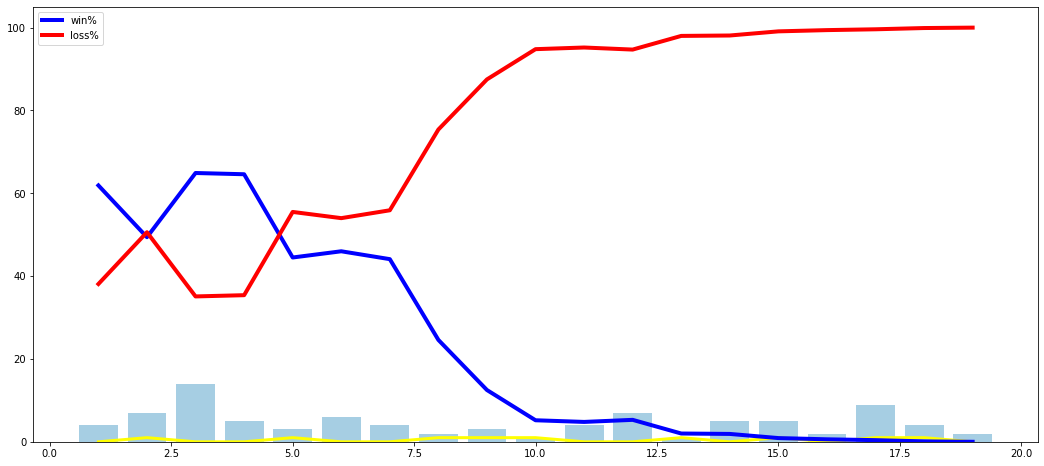

In [133]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4,label='win%')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='loss%')
plt.legend(loc='upper left')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.show()

In [139]:
delpred[delpred['batting_team']=='KKR']

,match_id,city,winner,runsin1st,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,curr_score,runleft,ballsleft,wickets,crr,rrr,battingfirstresult
617,3,Rajkot,KKR,183,2,KKR,GJ,1,1,G Gambhir,...,0,NaN,NaN,1,182,119,10,6.000000,9.176471,1
618,3,Rajkot,KKR,183,2,KKR,GJ,1,2,CA Lynn,...,0,NaN,NaN,1,182,118,10,3.000000,9.254237,1
619,3,Rajkot,KKR,183,2,KKR,GJ,1,3,CA Lynn,...,0,NaN,NaN,2,181,117,10,4.000000,9.282051,1
620,3,Rajkot,KKR,183,2,KKR,GJ,1,4,G Gambhir,...,0,NaN,NaN,2,181,116,10,3.000000,9.362069,1
621,3,Rajkot,KKR,183,2,KKR,GJ,1,5,G Gambhir,...,0,NaN,NaN,3,180,115,10,3.600000,9.391304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173956,11343,Mohali,KKR,186,2,KKR,KXIP,18,3,KD Karthik,...,0,NaN,NaN,178,8,15,7,10.171429,3.200000,1
173957,11343,Mohali,KKR,186,2,KKR,KXIP,18,4,KD Karthik,...,0,NaN,NaN,180,6,14,7,10.188679,2.571429,1
173958,11343,Mohali,KKR,186,2,KKR,KXIP,18,5,KD Karthik,...,0,NaN,NaN,182,4,13,7,10.205607,1.846154,1
173959,11343,Mohali,KKR,186,2,KKR,KXIP,18,6,KD Karthik,...,0,NaN,NaN,188,-2,12,7,10.444444,-1.000000,1
